## Bic Vu's Capstone Project
#### ML Guild - Apprentice Cohort 11
#### Notebook 5
2023-06-10

In [1]:
import pandas as pd
# import data_profiling as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os
# from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 12)

from datetime import date
today = date.today()

In [2]:
df = pd.read_parquet("data/output/all_features_aggZip_2023-06-10")
# df = df.drop(["zip", "pop2018"], axis=1).set_index("census_tract")
df = df.drop("zip", axis=1)
print(df.shape)
df.head()

(14256, 17)


,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,income_level,dti_level,derived_race,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip
0,25013813204,0.862095897815,201277.371762718569,302607.841576858191,91.437785742412,11.288333333333,middle,50,White,995.787467956543,0.88156998,1.51095000,1.12959,1.50590000,0.105720000,0.056499999,0.0108000000
1,25011040600,0.892316453372,285961.037087271456,438074.101620255213,162.275709825145,20.506250000000,upper,30,White,1312.117076873779,1.18348000,0.97759998,1.36818,1.20281990,0.103400000,0.149510000,0.0368800010
2,25027704200,0.897078689632,243595.350669818785,360452.268377800297,101.489980862321,4.450000000000,middle,50,White,381.519744873047,1.15543000,1.46491000,1.31876,1.46396990,0.105540000,0.158620000,0.0216300000
3,25015820202,0.861290526849,261565.597702565807,391370.493784057617,115.430058668091,8.760000000000,upper,30,White,915.396667480469,1.19240000,1.17985000,1.30741,1.23108990,0.103910000,0.130530000,0.0168999990
4,25013800400,0.809416265856,175619.893285605533,252751.344676762470,75.982170568134,30.257777777778,moderate,42,White,2616.550354003906,0.69744003,0.53930002,0.87842,0.67602003,0.086479999,0.061910000,0.0096899997


In [3]:
# Separate out numeric and categorical data columsn and define type
num_cols = ['approval', 'loan_amount', 'property_value', 'income',
       'tract_minority_population_percent', 'num_below_p50', 'ec_zip', 'nbhd_ec_zip',
       'exposure_grp_mem_zip', 'nbhd_exposure_zip', 'clustering_zip',
       'volunteering_rate_zip', 'civic_organizations_zip']
str_cols = ['census_tract', 'income_level', 'dti_level', 'derived_race']

df[num_cols] = df[num_cols].astype(float)
df[str_cols] = df[str_cols].astype(str)
df.dtypes

census_tract                          object
approval                             float64
loan_amount                          float64
property_value                       float64
income                               float64
tract_minority_population_percent    float64
income_level                          object
dti_level                             object
derived_race                          object
num_below_p50                        float64
ec_zip                               float64
nbhd_ec_zip                          float64
exposure_grp_mem_zip                 float64
nbhd_exposure_zip                    float64
clustering_zip                       float64
volunteering_rate_zip                float64
civic_organizations_zip              float64
dtype: object

### Prep categorical data for model - Encoding

In [4]:
df = pd.get_dummies(df, columns = ["income_level","dti_level", "derived_race"], prefix=["inc_", "dti_", "race"])
df.head()

,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip,inc__low,inc__middle,inc__moderate,inc__nan,inc__upper,dti__100,dti__20,dti__30,dti__36,dti__42,dti__50,dti__60,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_White
0,25013813204,0.862095897815,201277.371762718569,302607.841576858191,91.437785742412,11.288333333333,995.787467956543,0.88156998,1.51095000,1.12959,1.50590000,0.105720000,0.056499999,0.0108000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,25011040600,0.892316453372,285961.037087271456,438074.101620255213,162.275709825145,20.506250000000,1312.117076873779,1.18348000,0.97759998,1.36818,1.20281990,0.103400000,0.149510000,0.0368800010,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,25027704200,0.897078689632,243595.350669818785,360452.268377800297,101.489980862321,4.450000000000,381.519744873047,1.15543000,1.46491000,1.31876,1.46396990,0.105540000,0.158620000,0.0216300000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,25015820202,0.861290526849,261565.597702565807,391370.493784057617,115.430058668091,8.760000000000,915.396667480469,1.19240000,1.17985000,1.30741,1.23108990,0.103910000,0.130530000,0.0168999990,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,25013800400,0.809416265856,175619.893285605533,252751.344676762470,75.982170568134,30.257777777778,2616.550354003906,0.69744003,0.53930002,0.87842,0.67602003,0.086479999,0.061910000,0.0096899997,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### AutoGluon
<p>https://auto.gluon.ai/stable/api/autogluon.tabular.models.html

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df_train,df_test=train_test_split(df,test_size=0.15,random_state=42)
df_train.shape,df_test.shape

((12117, 32), (2139, 32))

In [7]:
df_test

,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip,inc__low,inc__middle,inc__moderate,inc__nan,inc__upper,dti__100,dti__20,dti__30,dti__36,dti__42,dti__50,dti__60,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_White
8845,30031001200,0.885026157779,533498.186790321604,1.040998008442e+06,255.598946257654,4.830000000000,137.407312035561,1.09876000,1.08565000,1.19567000,1.12925990,0.088270001,0.108520000,0.0098900003,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2954,51111930100,0.758614776091,153561.751445246598,2.119473625978e+05,72.298113572871,40.976666666667,596.819567680359,0.62943000,0.39765000,0.65858001,0.41732001,0.137260000,0.048050001,0.0203900000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5349,01001021100,0.589568411387,93054.803445712547,1.225031286895e+05,140.210220822948,79.320000000000,3603.374973297119,0.42645001,0.24936999,0.45030999,0.29679999,0.163940000,0.039850000,0.0184900000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9244,17143000100,0.820288652835,117740.603491536880,1.572236983553e+05,70.265651082979,20.523333333333,731.302255630493,0.86197001,0.87156999,0.98650002,0.94841999,0.107170000,0.060559999,0.0184499990,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8488,27003051001,0.891218759508,204050.900666596048,2.963321623075e+05,83.626976189500,28.777777777778,2427.680866241455,0.86593002,0.91109997,1.19608000,1.12374000,0.090360001,0.059790000,0.0132900000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,51169030500,0.778918098629,152745.549109022191,2.109032791258e+05,74.584108319966,5.562857142857,1363.975517272949,0.70731002,0.60705000,0.77177000,0.60960001,0.108140000,0.054860000,0.0146800000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13556,06077005004,0.865365218138,338740.977717465314,5.362468340102e+05,116.880976263629,55.975000000000,2431.004479408264,0.91143000,1.04624000,1.15876000,1.13941000,0.085670002,0.036279999,0.0068899998,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5023,12085000300,0.796795320564,270166.238744761969,4.637163487087e+05,141.154536217116,22.384285714286,1477.689163684845,0.73898000,0.42350000,0.89665002,0.62028998,0.088959999,0.084270000,0.0428400000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
12438,49027974100,0.851538468471,176622.238376750291,2.772143302012e+05,86.815903715675,16.020000000000,699.989471435547,0.94300002,0.85464001,1.05215000,0.90303999,0.134280000,0.045290001,0.0075900001,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [8]:
# Exclude CatBoost and random forrest, and neural network
#https://github.com/autogluon/autogluon/blob/109b773e3fc216cd61a8f815043d8a304d31b9ad/tabular/src/autogluon/tabular/trainer/model_presets/presets.py#L66

# !pip install autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

target = "approval"
metric = "rmse"
excluded_models = ['NN_TORCH', 'CAT', 'RF', 'FASTAI']

# excluded_models = ['KNN', 'NN_TORCH', 'custom']
predictor = TabularPredictor(label=target).fit(
    train_data=df_train, 
    excluded_model_types=excluded_models, 
    time_limit=120, 
    verbosity= 2, 
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_022102/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230612_022102/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.5.0: Mon Apr 24 20:51:50 PDT 2023; root:xnu-8796.121.2~5/RELEASE_X86_64
Train Data Rows:    12117
Train Data Columns: 31
Label Column: approval
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0, 0.0, 0.82165, 0.07629)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem

[1000]	valid_set's rmse: 0.0419557
[1000]	valid_set's rmse: 0.0452273
[1000]	valid_set's rmse: 0.0398671


	-0.043	 = Validation score   (-root_mean_squared_error)
	10.16s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 60.29s of the 100.24s of remaining time.


[1000]	valid_set's rmse: 0.0409573


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0434	 = Validation score   (-root_mean_squared_error)
	7.95s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 51.86s of the 91.8s of remaining time.
	-0.0433	 = Validation score   (-root_mean_squared_error)
	2.37s	 = Training   runtime
	0.57s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to 48.23s of the 88.18s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0435	 = Validation score   (-root_mean_squared_error)
	18.47s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 29.48s of the 69.42s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 913. Best iteration is:
	[694]	va

In [9]:
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-0.039899667924,-0.042243263695,3.258792161942,2.401987075806,104.253691673279,0.004822015762,0.000625133514,0.282025098801,3,True,14
1,LightGBMXT_BAG_L2,-0.040013756007,-0.042650445634,2.262104988098,1.420261383057,69.571197271347,0.107125043869,0.062654733658,4.457162141800,2,True,9
2,XGBoost_BAG_L2,-0.040107948682,-0.042855314024,2.345611095428,1.446263074875,78.691384792328,0.190631151199,0.088656425476,13.577349662781,2,True,12
3,ExtraTreesMSE_BAG_L2,-0.040119741299,-0.042563666096,2.717405796051,2.125459671021,68.092919349670,0.562425851822,0.767853021622,2.978884220123,2,True,11
4,WeightedEnsemble_L2,-0.040179733890,-0.042259394312,2.122368812561,1.275693416595,58.447695016861,0.004338979721,0.000757932663,0.365302085876,2,True,8
5,LightGBMLarge_BAG_L2,-0.040201716993,-0.042817905642,2.321375131607,1.426668167114,78.120653390884,0.166395187378,0.069061517715,13.006618261337,2,True,13
6,LightGBM_BAG_L2,-0.040214917042,-0.042653070209,2.227392911911,1.413136243820,69.951652288437,0.072412967682,0.055529594421,4.837617158890,2,True,10
7,LightGBMLarge_BAG_L1,-0.040356699806,-0.043088300213,0.391782999039,0.186689615250,19.105026960373,0.391782999039,0.186689615250,19.105026960373,1,True,7
8,LightGBMXT_BAG_L1,-0.040582942510,-0.042952892603,0.332715034485,0.187665700912,10.163907527924,0.332715034485,0.187665700912,10.163907527924,1,True,3
9,LightGBM_BAG_L1,-0.040761276727,-0.043415044103,0.202865362167,0.133380889893,7.948822975159,0.202865362167,0.133380889893,7.948822975159,1,True,4


In [10]:
predictor.evaluate(df_test)

/Users/ngvu/opt/anaconda3/lib/python3.9/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(
Evaluation: root_mean_squared_error on test data: -0.03985582016238834
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.03985582016238834,
    "mean_squared_error": -0.001588486400816641,
    "mean_absolute_error": -0.02876924000518339,
    "r2": 0.7070154319401782,
    "pearsonr": 0.8409075687940584,
    "median_absolute_error": -0.021410344963759487
}


{'root_mean_squared_error': -0.03985582016238834,
 'mean_squared_error': -0.001588486400816641,
 'mean_absolute_error': -0.02876924000518339,
 'r2': 0.7070154319401782,
 'pearsonr': 0.8409075687940584,
 'median_absolute_error': -0.021410344963759487}

In [10]:
best_model = predictor.get_model_best()
best_model

'WeightedEnsemble_L3'

### Create predictions and compare with actuals

In [16]:
test_data = df_test.drop(['approval'],axis=1)
predictions = predictor.predict(test_data).reset_index(drop=True)
print(predictions)

0       0.883341610432
1       0.733592033386
2       0.583917140961
3       0.797151803970
4       0.863949775696
             ...      
2134    0.809813737869
2135    0.835254251957
2136    0.836112082005
2137    0.845569133759
2138    0.866484224796
Name: approval, Length: 2139, dtype: float32


In [17]:
X_train = df_train.drop("approval", axis=1)
X_test = df_test.drop("approval", axis=1)
y_train = df_train[["approval"]]
y_test = df_test[["approval"]]

In [28]:
actual_pred = y_test.reset_index(drop=True)
actual_pred["predictions"] = predictions
actual_pred["residual"] = abs(actual_pred["approval"]-actual_pred["predictions"])
actual_pred.to_csv("data/output/actual_prediction_AutoGluon"+str(today)+".csv")
actual_pred

,approval,predictions,residual
0,0.885026157779,0.883341610432,0.001684547347
1,0.758614776091,0.733592033386,0.025022742704
2,0.589568411387,0.583917140961,0.005651270426
3,0.820288652835,0.797151803970,0.023136848865
4,0.891218759508,0.863949775696,0.027268983813
...,...,...,...
2134,0.778918098629,0.809813737869,0.030895639240
2135,0.865365218138,0.835254251957,0.030110966181
2136,0.796795320564,0.836112082005,0.039316761441
2137,0.851538468471,0.845569133759,0.005969334712


In [29]:
top = actual_pred[:5]
bottom = actual_pred[-5:]
X_test_tb = pd.concat([top, bottom])
X_test_tb

,approval,predictions,residual
0,0.885026157779,0.883341610432,0.001684547347
1,0.758614776091,0.733592033386,0.025022742704
2,0.589568411387,0.583917140961,0.005651270426
3,0.820288652835,0.797151803970,0.023136848865
4,0.891218759508,0.863949775696,0.027268983813
2134,0.778918098629,0.809813737869,0.030895639240
2135,0.865365218138,0.835254251957,0.030110966181
2136,0.796795320564,0.836112082005,0.039316761441
2137,0.851538468471,0.845569133759,0.005969334712
2138,0.902030053257,0.866484224796,0.035545828461


### RMSE

In [21]:
from sklearn.metrics import mean_squared_error
actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
mse = mean_squared_error(actuals, predictions)
print("MSE: %f" % (mse))

MSE: 0.001592


In [22]:
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.039900


### Plot predictions

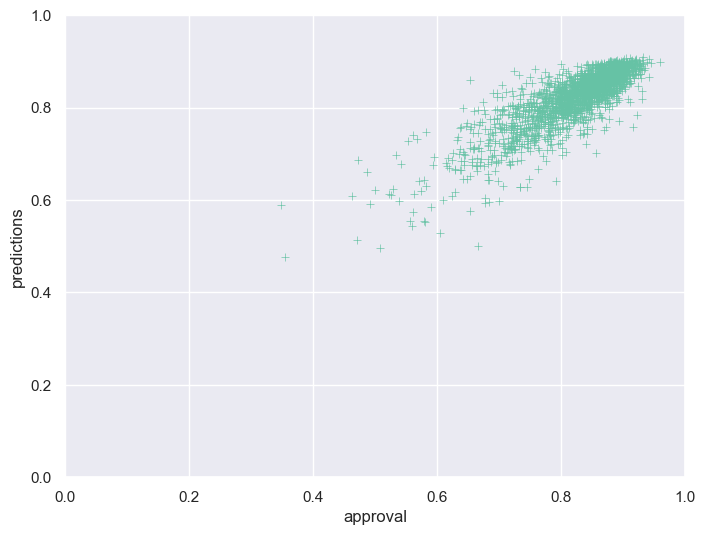

In [25]:
# scatter plot. x = true value, y = predictions
from datetime import date
today = date.today()

fig, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0,1)

sns.set_theme()
sns.set_palette("Set2")

actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
scatter = sns.scatterplot(data=actual_pred, x=actuals, y=predictions, marker="+")
scatter.figure.savefig("charts/charts_final/scatter_actuals-predictions_AutoGluon-"+str(today)+".png")

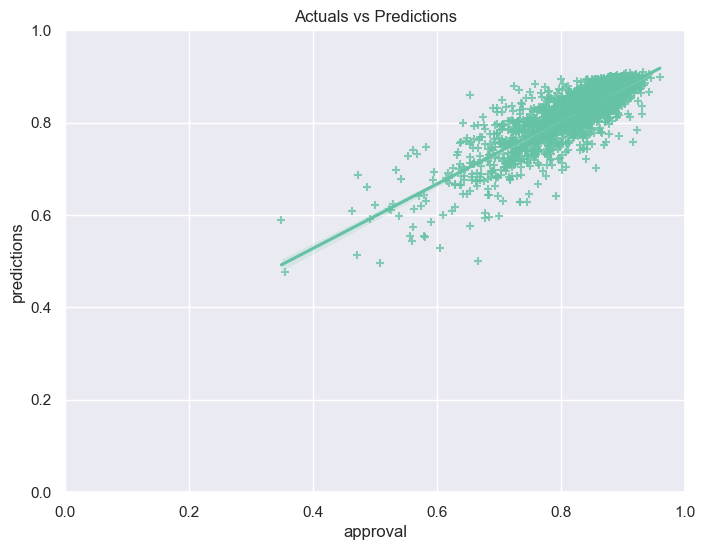

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0,1)

sns.set_theme()
sns.set_palette("Set2")

# sns.title("Actuals vs Predictions")
actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
reg_scatter = sns.regplot(data = actual_pred, x="approval", y="predictions", marker="+")
reg_scatter.set(title='Actuals vs Predictions')
# reg_scatter.figure.savefig("charts/charts_final/reg_actuals-predictions-AutoGluon"+str(today)+".png")

### The End